In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

# Q2 - Adding features

## (a) 

## Setting up data

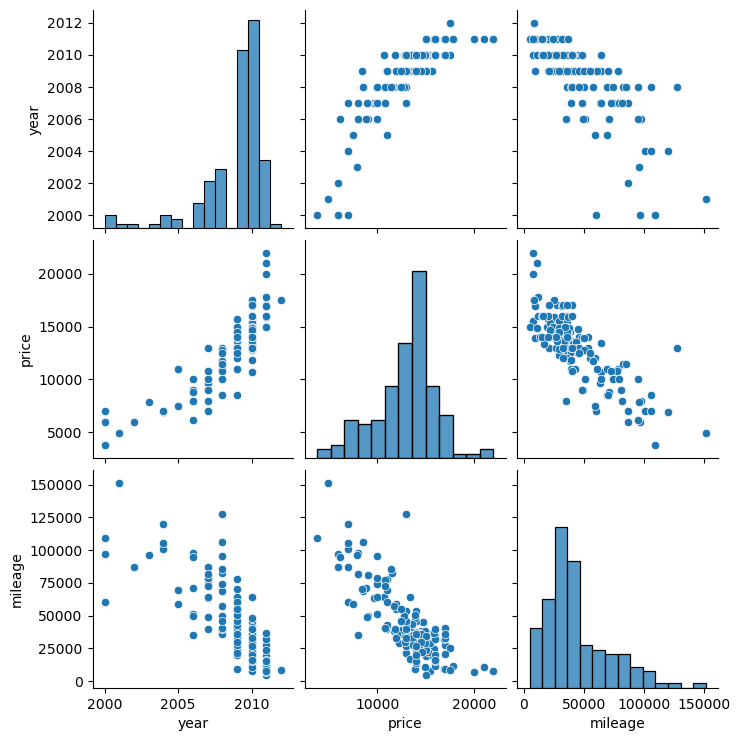

In [129]:
carData = pd.read_csv("fordFocus.csv")
sns.pairplot(data=carData)
plt.show()

## Creating linear regression model

### Adding features and splitting data

In [207]:
features = ['year','mileage']
XTrain, XTest, YTrain, YTest = train_test_split(
    carData[features].values,
    carData.price,
    test_size=0.2,
)

### Training the model and creating a prediction

In [208]:
model = LinearRegression()
model.fit(XTrain,YTrain)
prediction = model.predict(XTest)

### Plotting data 

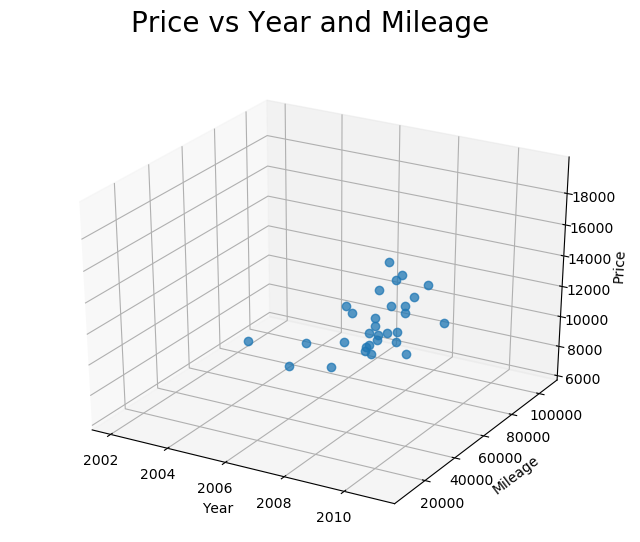

In [209]:
# priceRange, mileageRange = np.meshgrid(
#     np.linspace(carData.price.min(),carData.price.max()),
#     np.linspace(carData[features].values.min(),carData[features].values.max()),
#     )


figure = plt.figure(figsize=(8,6))
figure.suptitle("Price vs Year and Mileage",fontsize=20)

axes = figure.add_subplot(projection="3d")
axes.plot(XTest[:,0],XTest[:,1],YTest,marker="o",zorder=15,linestyle='none',alpha=0.75)
# axes.scatter(mileageRange,priceRange,prediction, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
axes.set_xlabel('Year')
axes.set_ylabel('Mileage')
axes.set_zlabel('Price')

# print('Intercept: \n', model.intercept_)
# print('Coefficients: \n', model.coef_)
plt.show()
# test = [[2010,7784]]
# print('Predicted price is',model.predict(test)[0])

### Computing R^2 and MSE 

In [210]:
rr  = model.score(XTest,YTest)
mse = mean_squared_error(prediction,YTest)
print('MSE: ', mse)
print('R squared: ', rr)

MSE:  2482522.735955247
R squared:  0.7601126579663694


### Comparison with previous model

Higher R squared -> improved model (previous model was underfitted?) 76% of data fits the model by R squared

## (b)

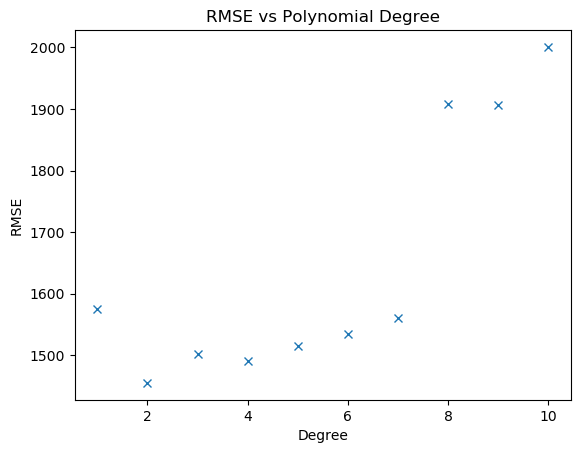

In [251]:
maxDeg = 10

RSquare = np.zeros(maxDeg+1)
RMSE = np.zeros(maxDeg+1)

for deg in range(1,maxDeg+1):
    
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    polyModel = LinearRegression()
    polyModel.fit(XTrans,YTrain)
    
    XTestTrans = poly.fit_transform(XTest)
    # print('\nDegree: ', deg, ':')
    RSquare[deg] = polyModel.score(XTestTrans,YTest)
    # print('R squared: ', RSquare[deg])
    RMSE[deg] = np.sqrt(mean_squared_error(polyModel.predict(XTestTrans),YTest))
    # print('RMSE: ', RMSE[deg])

plt.plot(range(1,maxDeg+1), RMSE[1:], 'x')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()



Overfitted when more than than 2 degrees used
Under fitted when less than 2 degrees used